# CAPSTONE 3 - TELCO CUSTOMER CHURN
# HANDIKA EKI WINATA

## 1. DATA UNDERSTANDING
---

### Background

In the competitive landscape of the telecommunications industry, understanding customer churn — the tendency of customers to cease doing business with a company — is pivotal for sustaining growth. Customer churn, also known as customer attrition, refers to the phenomenon where customers stop doing business with a company or service. In the context of the telecommunications industry, it refers to subscribers who decide to move their business from one service provider to another. Churn can occur for a variety of reasons including dissatisfaction with service quality, better offers from competitors, changes in the customer's personal circumstances, among others.

The "Telco Customer Churn" dataset offers a deep dive into the profiles of individuals who have discontinued their services with a telco company. This dataset encompasses a variety of features including the tenure of the customer with the company, the nature of services subscribed to, and the type of contract held, among others. Central to our analysis is the 'Churn' variable, an indicator that reveals whether a customer has decided to end their relationship with the company.

### Problem Statement

Our objective is to unravel the patterns and trends that dictate customer churn, leveraging the rich data available to build a predictive model that can accurately identify potential churn customers. The overarching question guiding this analysis is, "What are the key determinants of customer churn, and how can we utilize this information to predict potential churn accurately?". By answering this question, this project aims to empower telco companies with the insights necessary to devise strategies that foster long-lasting relationships with their customer base, thereby reducing churn and promoting customer loyalty. One of the known key business metrics is `The cost of retaining an existing customer is far less than acquiring a new one`

> Target:

0 : Not Churn (Retained)

1 : Churn (Turnover)

### Data DIctionary

| # | Feature | Description
| --- | --- | ---
| 1 | Dependents | Whether the customer has dependents or not
| 2 | tenure | Number of months the customer has stayed with the company
| 3 | OnlineSecurity | Whether the customer has online security or not
| 4 | OnlineBackup | Whether the customer has online backup or not
| 5 | InternetService | Whether the client is subscribed to Internet service
| 6 | DeviceProtection | Whether the client has device protection or not
| 7 | TechSupport | Whether the client has tech support or not
| 8 | Contract | Type of contract according to duration
| 9 | PaperlessBilling | Bills issued in paperless form
| 10 | MonthlyCharges | Amount of charge for service on monthly bases
| 11 | Churn | 1 if the customer Churn, 0 otherwise

question:
1. apakah perlu d drop duplicate?
2. spt apa rekomendasi dari aspek bisnis, data, dan model
3. apa maksud masukkan harga sbg rekomendasi?
4. apakah menambah lebih banyak fitur demographics akan mungkin membuat model jadi lebih akurat?
5. Apakah perlu cek overfitting underfitting

## DATA CLEANING & EDA
---

In [34]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.4 MB/s eta 0:00:00


In [166]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

## sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.pipeline import make_pipeline

# train test split
from sklearn.model_selection import train_test_split

# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # bagging
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier # boosting
# from catboost import CatBoostClassifier

# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_validate, StratifiedKFold

# metrics untuk regresi
from sklearn.metrics import f1_score, classification_report, make_scorer, fbeta_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore")

# Set max columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [191]:
url = 'https://raw.githubusercontent.com/ekiwinataa/Capstone3_TelcoChurnAnalysis_ML/main/telco_customer_churn.csv'
df = pd.read_csv(url)
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


### Null Values & Data Type Check

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


> No Null values found & Data types are in a correct format

### Duplicated Data

In [193]:
df.duplicated().sum()

77

In [194]:
pd.set_option('display.max_rows', None)

df[df.duplicated()]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
701,No,41,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.65,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.65,Yes
951,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.15,Yes
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
1294,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.85,Yes
1430,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,74.45,Yes
1513,No,2,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,19.65,No
1620,No,72,Yes,Yes,Fiber optic,Yes,Yes,Two year,No,115.15,No
1881,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,19.60,Yes


> There are few duplicates data but after observing them, they are actually having the same value in several features only and since the Customer ID is not provided in this data, it can be concluded that the duplicated data will be left as it be

In [195]:
df['Churn'].value_counts() / len(df)

No     0.733063
Yes    0.266937
Name: Churn, dtype: float64

In [196]:
df.drop_duplicates(inplace=True)

In [197]:
df['Churn'].value_counts() / len(df)

No     0.734597
Yes    0.265403
Name: Churn, dtype: float64

### Unique Values

In [198]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


> `No internet service` value in several features can be classified as `No` since they are pointing the same meaning. Thus, replacement will be done to avoid missunderstanding

In [199]:
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']].replace({'No internet service' : 'No'})

In [200]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,2,"[No, Yes]"
3,OnlineBackup,2,"[No, Yes]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,2,"[Yes, No]"
6,TechSupport,2,"[Yes, No]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


> Now the unique values are more simplified

In [201]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dependents,4853,2,No,3380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,4853.0,NaN,NaN,NaN,32.679992,24.395554,0.0,9.0,29.0,56.0,72.0
OnlineSecurity,4853,2,No,3423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,4853,2,No,3151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,4853,3,Fiber optic,2154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceProtection,4853,2,No,3165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TechSupport,4853,2,No,3445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contract,4853,3,Month-to-month,2665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,4853,2,Yes,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,4853.0,NaN,NaN,NaN,65.321543,29.783655,18.8,40.05,70.6,90.05,118.65


In [202]:
df['Churn'].value_counts(), df['Churn'].value_counts() / len(df) * 100

(No     3565
 Yes    1288
 Name: Churn, dtype: int64,
 No     73.459716
 Yes    26.540284
 Name: Churn, dtype: float64)

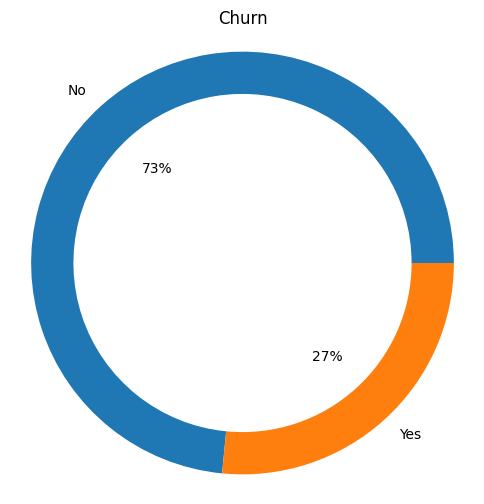

In [203]:
churn_count = df['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    churn_count,
    labels=churn_count.index,
    autopct='%1.0f%%',
    wedgeprops={'width': 0.2}  # Set the width of the hole to create a donut
)
plt.title('Churn')
plt.axis('equal');
# plt.savefig('problem_statement.png')

> From 4853 clients, 27% of them are turning over from our company which is very worth to be considered since it will affect our overall business. Thus, reducing this number is very crutial

In [204]:
# Define the income bins and labels
tenure_bins = [0, 12, 24, 36, 48, 60, float('inf')]  # Custom bin edges
tenure_labels = ['1y', '2y', '3y', '4y', '5y', '>5y']

# Add a new column for income categories
df['tenure_category'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

df['tenure_category'].value_counts()


1y     1396
>5y    1018
2y     721 
3y     616 
5y     586 
4y     516 
Name: tenure_category, dtype: int64

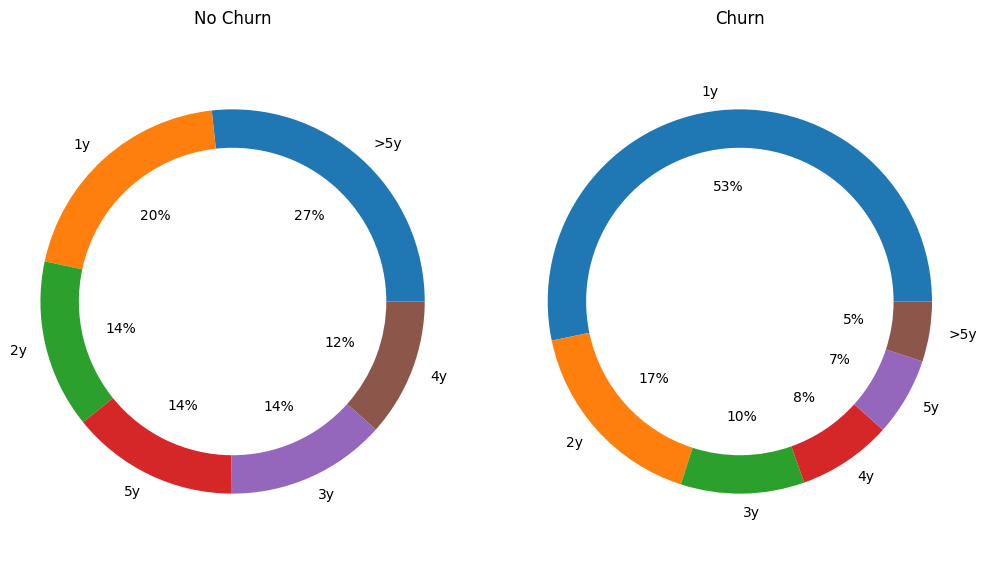

In [205]:
# Assuming df is your data frame and it has been properly loaded
tenure_churn_no = df[df['Churn'] == 'No']['tenure_category'].value_counts()
tenure_churn_yes = df[df['Churn'] == 'Yes']['tenure_category'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 7))  # Adjusted subplot grid to 1 row and 2 columns

# Plot for Churn = No
axes[0].pie(
    tenure_churn_no,
    labels=tenure_churn_no.index,
    autopct='%1.0f%%',
    wedgeprops={'width': 0.2},
)
axes[0].set_title('No Churn')  # Set title for the first subplot
axes[0].axis('equal')  # Set axis to be equal for the first subplot

# Plot for Churn = Yes
axes[1].pie(
    tenure_churn_yes,
    labels=tenure_churn_yes.index,
    autopct='%1.0f%%',
    wedgeprops={'width': 0.2},
)
axes[1].set_title('Churn')  # Set title for the second subplot
axes[1].axis('equal');  # Set axis to be equal for the second subplot

# plt.tight_layout()
# plt.show()
# plt.savefig('problem_statement.png')  # Uncomment this line if you want to save the figure


> Here, we can see that after categorizing the tenure, most of the Churn customer came from the tenure of below 1 year. Thus, this client is considered as new customer and they are likely not satisfied in our service.

In [206]:
df.drop(columns='tenure_category', inplace=True)

In [207]:
cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O'))]
cat_features

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

In [208]:
for i in cat_features:
    print(df[i].value_counts())
    print()

No     3380
Yes    1473
Name: Dependents, dtype: int64

No     3423
Yes    1430
Name: OnlineSecurity, dtype: int64

No     3151
Yes    1702
Name: OnlineBackup, dtype: int64

Fiber optic    2154
DSL            1696
No             1003
Name: InternetService, dtype: int64

No     3165
Yes    1688
Name: DeviceProtection, dtype: int64

No     3445
Yes    1408
Name: TechSupport, dtype: int64

Month-to-month    2665
Two year          1143
One year          1045
Name: Contract, dtype: int64

Yes    2925
No     1928
Name: PaperlessBilling, dtype: int64

No     3565
Yes    1288
Name: Churn, dtype: int64



In [209]:
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O'))]
num_features

['tenure', 'MonthlyCharges']

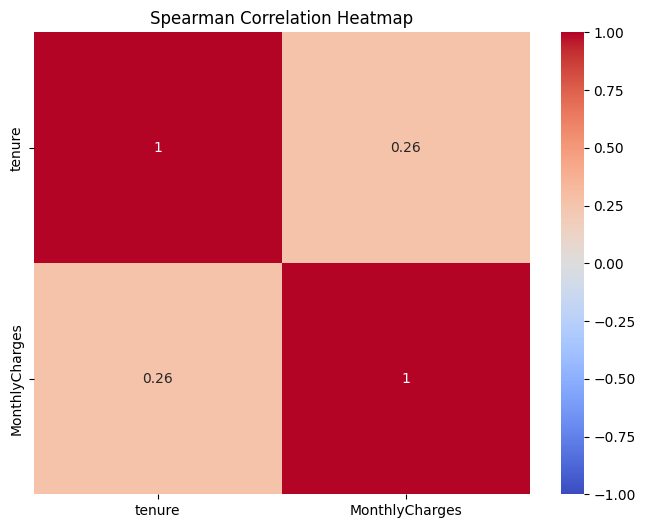

In [210]:
# cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']

correlations = df[num_features].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap')
plt.show()

> From the correlation heatmap, it can be seen that their correlation is not very high which indicates that there won't be a chance for muticolinearity from happening

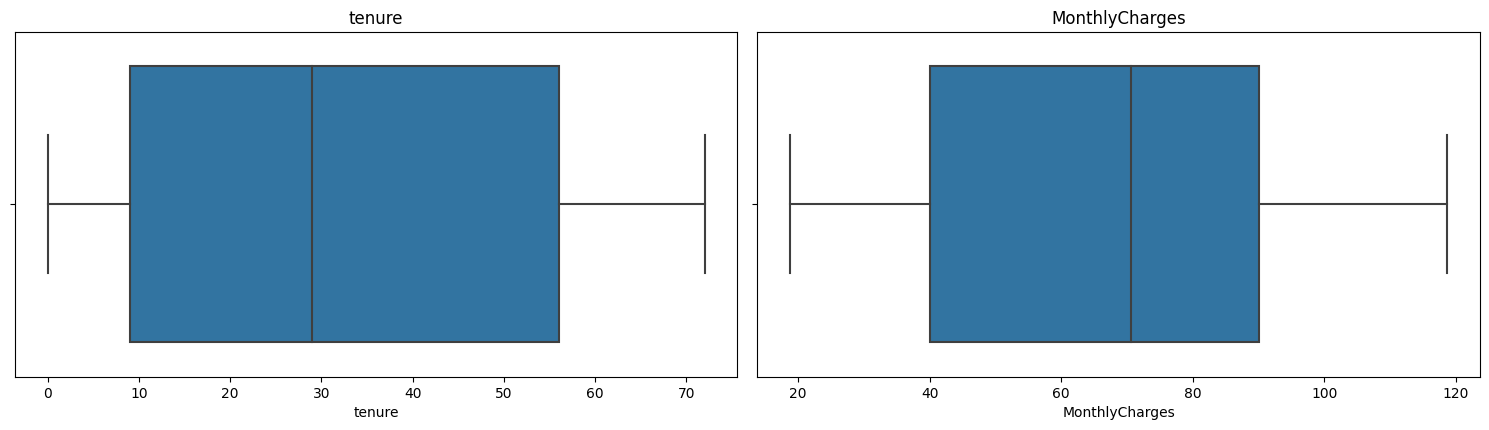

In [211]:
plotnumber = 1

plt.figure(figsize=(15,8))

for kolom in num_features:
    plt.subplot(2,2, plotnumber)
    sns.boxplot(data=df, x=kolom)
    plt.title(kolom)
    plt.tight_layout()
    plotnumber = plotnumber + 1

plt.tight_layout()

### Define Case

- True Positives (TP): Customers who were predicted to churn and actually churned
- True Negatives (TN): Customers who were predicted not to churn and actually did not churn
- False Positives (FP): Customers who were predicted to churn but did not actually churn (Type I error)
- False Negatives (FN): Customers who were predicted not to churn but actually churned (Type II error)

> In the context of customer churn, both types of errors can be costly for the business:

False Positives (FP): These are customers who were flagged as likely to churn but did not. If the company spends resources on retaining these customers, it might be seen as a waste, but it could potentially increase customer satisfaction and loyalty.

False Negatives (FN): These are customers who were not flagged as likely to churn but did. This is generally seen as more problematic because the company loses out on the opportunity to retain customers who are unsatisfied with the service.

> In many business contexts, FN is often considered more serious because retaining existing customers is usually less costly than acquiring new ones. Therefore, reducing the number of false negatives (i.e., identifying potential churn customers correctly) might be seen as more important.

> Thus, given the focus on reducing false negatives, recall might be the most important metric ✅

## PREPROCESSING

### Data Split

In [212]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,No


In [213]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [214]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [215]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,2,"[No, Yes]"
3,OnlineBackup,2,"[No, Yes]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,2,"[Yes, No]"
6,TechSupport,2,"[Yes, No]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


### Scaling and Encoding

In [216]:
ordinal_mapping = [{'col':'Contract', 'mapping':{'Month-to-month':0,
                                       'One year':1,
                                       'Two year':2}}]

# transformer

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['Contract'], mapping=ordinal_mapping)),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('robust', RobustScaler(), ['tenure', 'MonthlyCharges']),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['Contract']),
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'InternetService', 'OnlineBackup','DeviceProtection', 'TechSupport', 'PaperlessBilling']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Contract'],
                                                                 mapping=[{'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['Contract']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

In [217]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Contract'],
                                                                 mapping=[{'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['Contract']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

## MODELING

### Model Benchmarking

In [221]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import VotingClassifier, StackingClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


# Define models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state = 42)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# Define various type model
estimators = [
    ('tree', DecisionTreeClassifier(random_state=101)),
    ('knn', KNeighborsClassifier()),
    ('logreg', LogisticRegression(random_state=101))]

stacking = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(random_state=101)
)
votingSoft = VotingClassifier(estimators=estimators, voting='soft')
votingHard = VotingClassifier(estimators=estimators, voting='hard')

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()
smoteen = SMOTEENN(random_state=42)

# Define imbalance treatment methods
models = {'KNN': knn,
          'Logistic Regression':logreg,
          'Decision Tree': tree,
          'Voting Classifier - Soft': votingSoft,
          'Voting Classifier - Hard': votingHard,
          'Stacking': stacking,
          'XGBoost' : xgb,
          'Random Forest' : rf,
          'Gradient Boosting' : gboost
          }

resample = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
    'smoteenn': smoteen
}

metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_algo = []
list_resample = []


for name_resample,resample in resample.items():
    for name_algo,model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample == None:
            estimator = Pipeline([
                ('transorm', transformer),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('transorm', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_algo.append(name_algo)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
        test_precision_arr.append(scores['test_precision'].mean())
        test_recall_arr.append(scores['test_recall'].mean())
        test_f1_arr.append(scores['test_f1'].mean())


model_bench = pd.DataFrame({
    'model': list_algo,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr
})

model_bench

,model,resample,accuracy,precision,recall,f1
0,KNN,none,0.687429,0.587815,0.503162,0.541272
1,Logistic Regression,none,0.703637,0.629452,0.517633,0.567180
2,Decision Tree,none,0.662572,0.493824,0.515560,0.504170
3,Voting Classifier - Soft,none,0.688675,0.571523,0.517638,0.542503
4,Voting Classifier - Hard,none,0.700222,0.620492,0.514540,0.561869
5,Stacking,none,0.700537,0.650301,0.497960,0.562893
6,XGBoost,none,0.691313,0.592991,0.508322,0.546895
7,Random Forest,none,0.691968,0.603675,0.502153,0.546754
8,Gradient Boosting,none,0.710469,0.654982,0.519705,0.579079
9,KNN,ros,0.702292,0.459766,0.704973,0.556361


In [222]:
model_bench.sort_values('recall', ascending=False).head()

,model,resample,accuracy,precision,recall,f1
46,Logistic Regression,smoteenn,0.756921,0.494682,0.815742,0.615538
19,Logistic Regression,rus,0.759191,0.503538,0.806437,0.619655
26,Gradient Boosting,rus,0.757364,0.500825,0.805406,0.617312
23,Stacking,rus,0.760393,0.506622,0.804353,0.621348
10,Logistic Regression,ros,0.760976,0.510660,0.799167,0.622871


In [223]:
model_bench.sort_values('accuracy', ascending=False).head()


,model,resample,accuracy,precision,recall,f1
53,Gradient Boosting,smoteenn,0.761953,0.517775,0.789888,0.625376
10,Logistic Regression,ros,0.760976,0.510660,0.799167,0.622871
23,Stacking,rus,0.760393,0.506622,0.804353,0.621348
17,Gradient Boosting,ros,0.760032,0.522343,0.777448,0.624523
35,Gradient Boosting,smote,0.759870,0.537482,0.754682,0.627609


> If considering the recall, LogReg is the best model. However, its accuracy is lower than Gradient Boosting. So, both of this model will be tested again to predict the test data and further analysis will be made to determine the best model

### Predict to Test data

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Define the chosen models
logreg = LogisticRegression(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)
smoteenn = SMOTEENN(random_state=42)

models = [
    ('Logistic Regression', logreg),
    ('Gradient Boosting', gboost)
]

# List to store results
metrics = []
conf_matrices = []

for name, model in models:
    pipeline = Pipeline([
        ('transform', transformer),
        ('resampling', smoteenn),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    metrics.append([
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

    conf_matrices.append(confusion_matrix(y_test, y_pred))

# Create a DataFrame to display the metrics for both models
metrics_df = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=['Logistic Regression', 'Gradient Boosting'])
metrics_df


,Accuracy,Precision,Recall,F1
Logistic Regression,0.730643,0.495292,0.816770,0.616647
Gradient Boosting,0.738880,0.505030,0.779503,0.612943


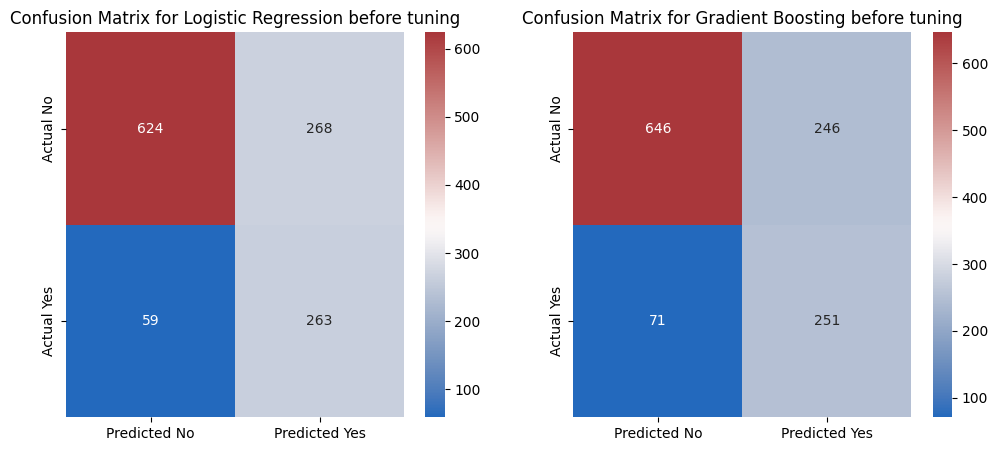

In [239]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Display the confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, (name, _) in enumerate(models):
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap='vlag',
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix for {name} before tuning");

# plt.tight_layout()
# plt.show()

> After predicting test data, logistics regression has higher accuracy and recall. So, LogReg will be train into hyperparameter tunning

In [240]:
# logreg = LogisticRegression(random_state=42)
# smoteenn = SMOTEENN(random_state=42)

# score_accuracy = []
# score_precision = []
# score_recall = []
# score_f1 = []


# model = Pipeline([
#     ('transform', transformer),
#     ('resampling', smoteenn),
#     ('model', logreg)
# ])


# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# score_accuracy.append(accuracy_score(y_test, y_pred))
# score_precision.append(precision_score(y_test, y_pred))
# score_recall.append(recall_score(y_test, y_pred))
# logreg_f1.append(f1_score(y_test, y_pred))

# logreg_before_tuning = pd.DataFrame({'Accuracy': score_accuracy,
#                                     'Precision': score_precision,
#                                     'Recall': score_recall,
#                                     'F1 Score': score_f1,},
#                                     index=['logreg before tuning'])
# logreg_before_tuning

In [241]:
# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# display.plot();

In [242]:
# print(classification_report(y_test, y_pred))


In [243]:
# gboost = GradientBoostingClassifier(random_state=42)
# smoteenn = SMOTEENN(random_state=42)

# score_accuracy = []
# score_precision = []
# score_recall = []
# score_f1 = []


# model2 = Pipeline([
#     ('transform', transformer),
#     ('resampling', smoteenn),
#     ('model', gboost)
# ])


# model.fit(X_train, y_train)
# y_pred2 = model.predict(X_test)
# score_accuracy.append(accuracy_score(y_test, y_pred))
# score_precision.append(precision_score(y_test, y_pred))
# score_recall.append(recall_score(y_test, y_pred))
# score_f1.append(f1_score(y_test, y_pred))

# score_before_tuning2 = pd.DataFrame({'Accuracy': score_accuracy,
#                                     'Precision': score_precision,
#                                     'Recall': score_recall,
#                                     'F1 Score': score_f1,},
#                                     index=['gboost before tuning'])
# score_before_tuning2

In [244]:
# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# cm2 = confusion_matrix(y_test, y_pred2, labels=model.classes_)

# display2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model.classes_)

# display2.plot();

In [245]:
# print(classification_report(y_test, y_pred))


In [246]:
# from sklearn.feature_selection import RFE

# logreg = LogisticRegression(random_state=42)
# smoteenn = SMOTEENN(random_state=42)

# score_accuracy = []
# score_precision = []
# score_recall = []
# score_f1 = []


# model = Pipeline([
#     ('transform', transformer),
#     ('resampling', smoteenn),
#     ('felim', RFE(estimator=logreg, n_features_to_select=5)),
#     ('model', logreg)
# ])

# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# score_accuracy.append(accuracy_score(y_test, y_pred))
# score_precision.append(precision_score(y_test, y_pred))
# score_recall.append(recall_score(y_test, y_pred))
# score_f1.append(f1_score(y_test, y_pred))

# score_after_felim = pd.DataFrame({'Accuracy': score_accuracy,
#                                     'Precision': score_precision,
#                                     'Recall': score_recall,
#                                     'F1 Score': score_f1},
#                                     index=['LogReg after faeture selection'])
# score_after_felim

### Hyperparameter Tuning

In [247]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# hyperparameter untuk Logreg
hyperparam_space = {
    'model__penalty': ['l1', 'l2', 'elastic-net'],
    'model__C': [0.001, 0.1, 1.0, 5.0, 10.0],
    'model__solver': ['liblinear', 'saga', 'lbfgs'],
    'model__max_iter': [100, 500, 1000],
}

logreg = LogisticRegression(random_state=42, class_weight='balanced')
smoteenn = SMOTEENN(random_state=42)

pipe_model = Pipeline([
    ('prep', transformer),
    ('resampling', smoteenn),
    ('model', logreg)
])

# Define Grid Search
gridsearch = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring = 'recall',
    n_jobs = -1
)

In [248]:
gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust',
                                                                         RobustScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('pipe_ordinal_scale',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['Contract'],
                                                                                                         mapping=[{'col': 'Contract',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}]))...
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling'])])),
                                       ('resampling',
                                        SMOTEENN(random_state=42)),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.1, 1.0, 5.0, 10.0],
                         'model__max_iter': [100, 500, 1000],
                         'model__penalty': ['l1', 'l2', 'elastic-net'],
                         'model__solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='recall')

In [249]:
logreg_tuning = gridsearch.best_estimator_

logreg_tuning.fit(X_train, y_train)

y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = accuracy_score(y_test, y_pred_logreg_tuning)
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning)
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning)
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning)


logreg_after_tuning = pd.DataFrame({'Accuracy': accuracy_logreg_tuning,
                                   'Precision': precision_logreg_tuning,
                                   'Recall': recall_logreg_tuning,
                                   'F1': f1_logreg_tuning}, index=['Logistic Regression Tune'])
logreg_after_tuning.append(metrics_df).head(2)

,Accuracy,Precision,Recall,F1
Logistic Regression Tune,0.685338,0.452381,0.885093,0.598739
Logistic Regression,0.730643,0.495292,0.816770,0.616647


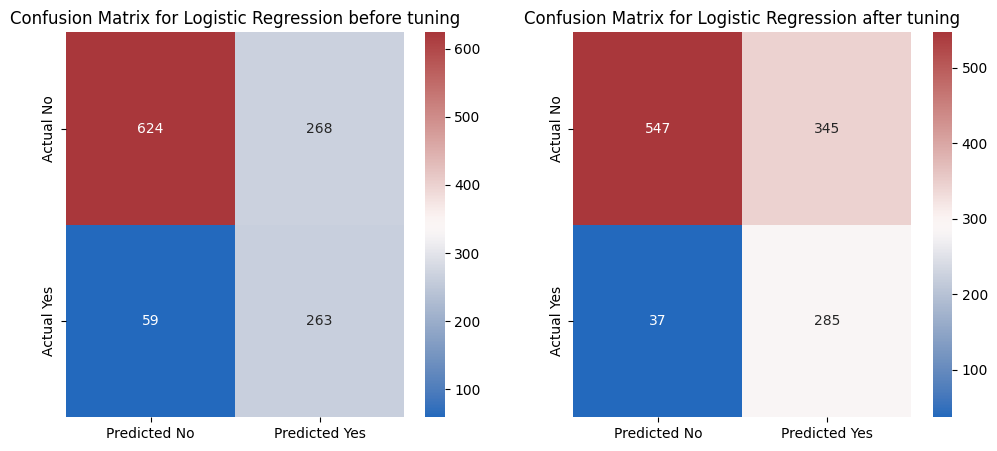

In [250]:
# Get the confusion matrix for the tuned model
conf_matrix_tuned = confusion_matrix(y_test, y_pred_logreg_tuning)

# Create a new list to store only the Logistic Regression models and their confusion matrices
logreg_models = [models[0], ('Logistic Regression', logreg_tuning)]
logreg_conf_matrices = [conf_matrices[0], conf_matrix_tuned]

# Display the confusion matrices for Logistic Regression before and after tuning
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted to 1 row and 2 columns
for i, (name, _) in enumerate(logreg_models):
    sns.heatmap(logreg_conf_matrices[i], annot=True, fmt='d', cmap='vlag',
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix for {name}" + (" before tuning" if i < len(logreg_models) - 1 else " after tuning"));

## Conclusion

After a comprehensive process of model benchmarking, testing, and hyperparameter tuning, the Logistic Regression emerged as the best model for predicting customer churn in the dataset. Before tuning, the model achieved an accuracy of 73% and a recall of 81%. However, after the tuning process, there was a slight decrease in accuracy to 68%, but an increase in recall to 88%.

In terms of false negatives (FN) and false positives (FP), the model exhibited a decrease in FN from 59 to 37 and an increase in FP from 268 to 345 post-tuning. This shift indicates that the tuning process made the model more sensitive to predicting churn, at the expense of incorrectly identifying more non-churn cases as churn.

## Recommendation

### Business Sector:

1. Customer Retention Strategy: Given the high recall rate, the business can confidently identify most customers who are likely to churn. This provides an opportunity to proactively engage these customers with retention strategies such as developing personalized marketing strategies targeting individuals who are predicted to churn, offering them incentives and personalized deals to retain them.

1. Loyalty Programs: Introduce loyalty programs that reward customers for staying with the service for a long time. Rewards could include discounts on monthly bills, free upgrades, or exclusive content and services

1. Bundled Services: Offer bundled services at a discounted rate to encourage customers to use more services from the same provider. Bundled services can increase customer stickiness and reduce the likelihood of churn

1. Resource Allocation: The increase in false positives suggests that resources might be expended on customers incorrectly identified as likely to churn. It would be beneficial to refine the model further to reduce false positives, ensuring resources are allocated more efficiently ???

1. Network Quality: Continuously monitor and improve network quality to ensure customer satisfaction. A significant portion of churn in the telco industry is attributed to poor service quality. Utilize feedback and data analytics to identify areas with poor network coverage and work on enhancing the network in those areas

1. Proactive Customer Service: Develop a proactive customer service approach where customers are contacted before they experience issues. For instance, if a network outage is anticipated in a particular area, informing customers in advance can build trust and reduce frustration

1. Personalized Communication: Personalize communication with customers based on their preferences and usage patterns. For instance, customers who frequently exceed their data limit might be offered a plan with a higher data cap at a special rate

1. Flexible Contract Terms: Offer flexible contract terms to cater to a wider audience. Some customers prefer short-term contracts due to their changing needs, while others prefer long-term contracts for stability. Providing options can reduce churn by meeting the diverse needs of customers

1. Feedback and Reviews: Encourage customers to provide feedback and reviews, and actively work on the feedback to improve services. Showcasing positive reviews and testimonials can also build a good reputation and reduce churn

### Model sector:

1. Continuous Monitoring and Updating: Regularly monitor the performance of the model and update it with fresh data to maintain its predictive accuracy. The telco industry is dynamic, and customer behavior can change over time, impacting the factors driving churn

1. Feedback Loop for Model Improvement: Establish a feedback loop where the predictions of the model are continuously compared with the actual outcomes. This feedback can be used to further train the model, helping it to learn and improve over time

1. Deployment in Real-Time Systems: Consider deploying the model in real-time systems to identify potential churn customers as soon as possible. Real-time predictions can enable the business to take immediate actions to retain customers

1. Automated Alerts: Develop a system of automated alerts based on the model's predictions. For instance, if a customer's behavior suddenly changes and they become a high-risk churn candidate, an alert could be triggered for the customer service team to reach out and address any issues

1. Experiment with Different Algorithms: While logistic regression has proven to be the best model so far, continuously experiment with different algorithms to see if any other models can offer better performance. Machine learning is a rapidly evolving field, and new algorithms are being developed regularly

1. Collaborative Approach: Encourage a collaborative approach where different teams (like data scientists, business analysts, and domain experts) work together to bring different perspectives and insights, which can be used to further refine the model

1. Model Interpretability: Focus on improving the interpretability of the model. Being able to understand and explain the model's predictions can be a valuable asset, especially when strategizing interventions to prevent churn. Tools and techniques such as SHAP (SHapley Additive exPlanations) can be used to understand the impact of different features on the model's predictions

### Data Sector:

1. Customer Demographics: Incorporate customer demographic data such as age, gender, occupation, and educational level. Understanding the demographic profile of a customer can provide deeper insights into their preferences and behavior, helping to predict churn more accurately. For instance, in reality, older customer tends to be more loyal and stick to one telco provider while young customer has a tendecy to move from one telco provider to another in a search for a suitable and worth-buying provider

1. Usage Patterns: Analyze detailed usage patterns, including the time of day when services are most used, the type of services used most frequently, and seasonal usage trends. This data can help in identifying patterns that are indicative of a potential churn

1. External Economic Factors: Consider incorporating data on external economic factors such as economic downturns, which might influence customer decisions to churn. For instance, the recent pandemic that we all have experienced, this aspect might affect the customer decision

1. Competitor Analysis: Conduct a competitor analysis to understand the strategies used by competitors to retain customers

1. Social Media Sentiment Analysis: Leverage social media sentiment analysis to gauge customer satisfaction and to identify potential churn signals early on. Negative sentiments on social platforms can be a precursor to churn